In [1]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py
import scipy.io

In [111]:
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='vortex'
npix_pupil = 512

npix_detector = 128
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector
defocus = 3/(2*np.pi)
vortex_charge = 4

In [132]:
highest_coeff = 15
rms_phase_mode = 5e-9

M = highest_coeff-1
N = npix_detector
wfe_array = np.zeros((M,M+1))

initial_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(M+1):
    wfe_array[:,i] = initial_array
    
for i in range(M):
    wfe_array[i,i+1] = wfe_array[i,i+1] + rms_phase_mode
print(wfe_array[:,:3])
    

[[0.e+00 5.e-09 0.e+00]
 [0.e+00 0.e+00 5.e-09]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]


In [133]:
data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,vortex_charge=vortex_charge)

In [134]:
print(np.max(data[:,:,0]))
print(np.max(data[:,:,1]))

0.0006837145367767901
0.0007705461970059015


<IPython.core.display.Javascript object>


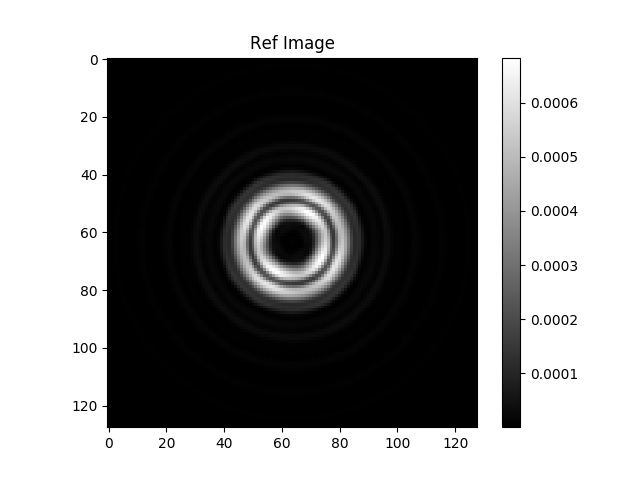

<IPython.core.display.Javascript object>


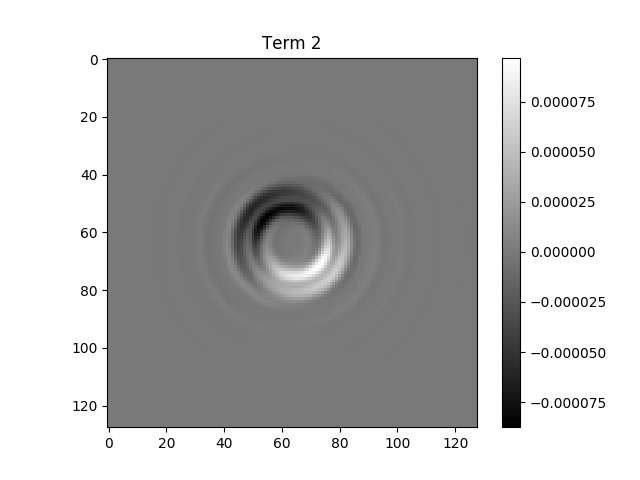

<IPython.core.display.Javascript object>


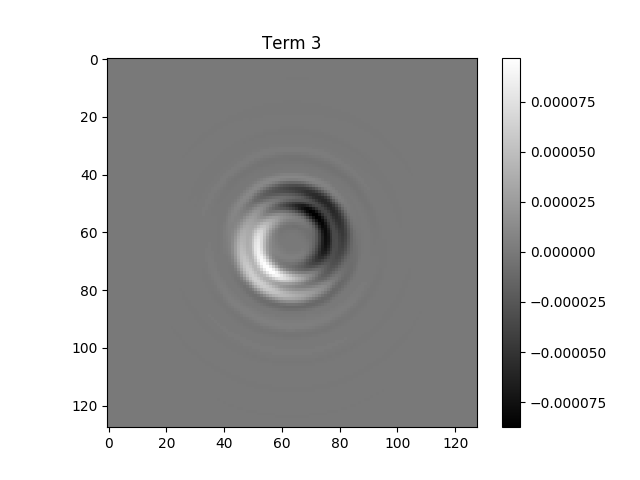

<IPython.core.display.Javascript object>


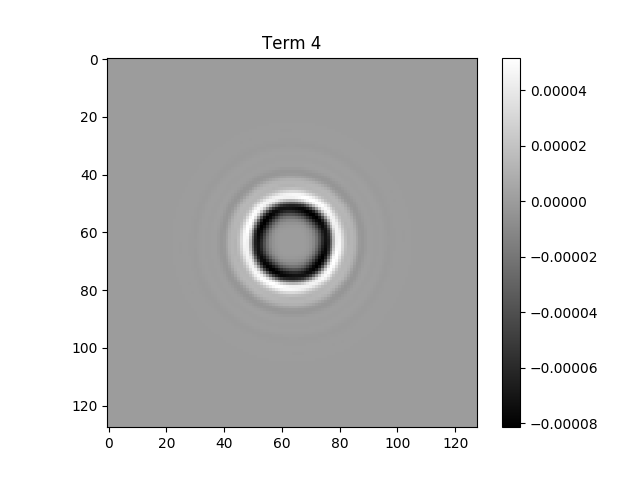

<IPython.core.display.Javascript object>


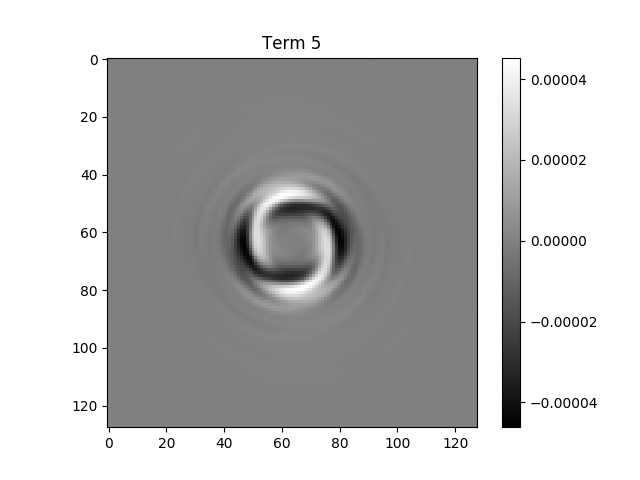

<IPython.core.display.Javascript object>


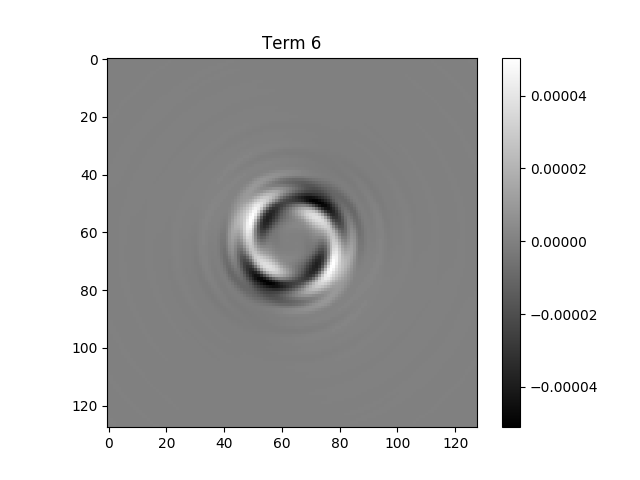

<IPython.core.display.Javascript object>


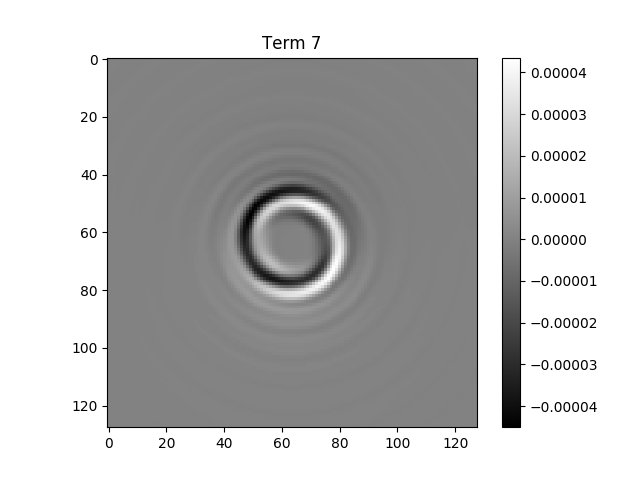

<IPython.core.display.Javascript object>


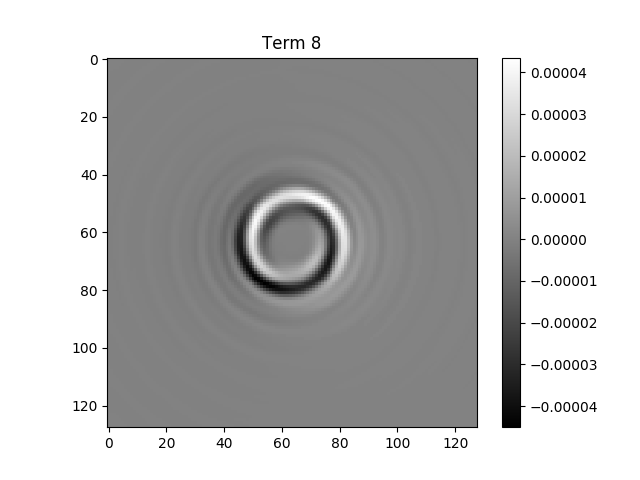

<IPython.core.display.Javascript object>


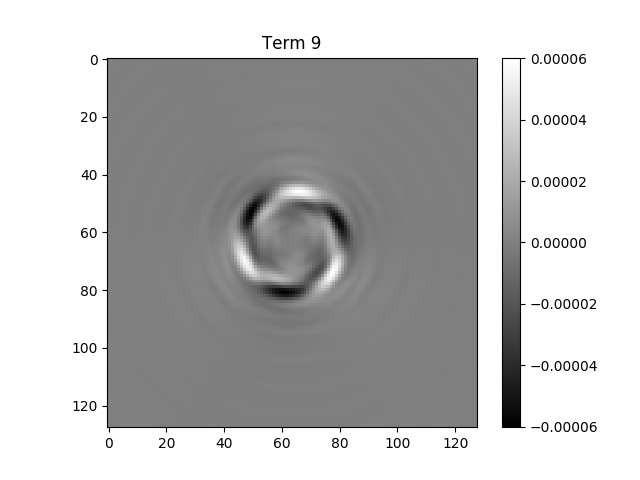

<IPython.core.display.Javascript object>


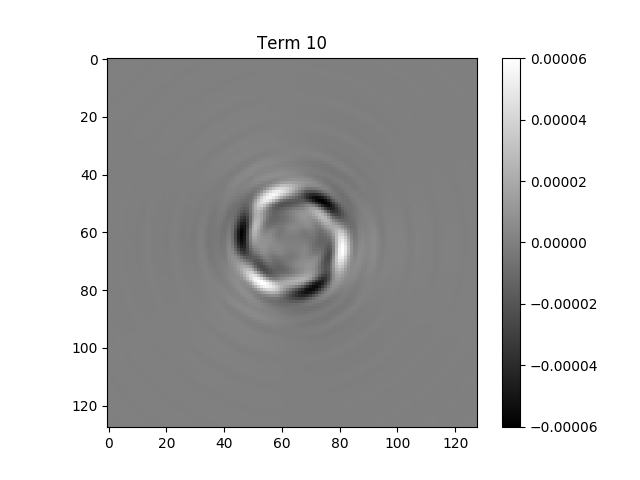

<IPython.core.display.Javascript object>


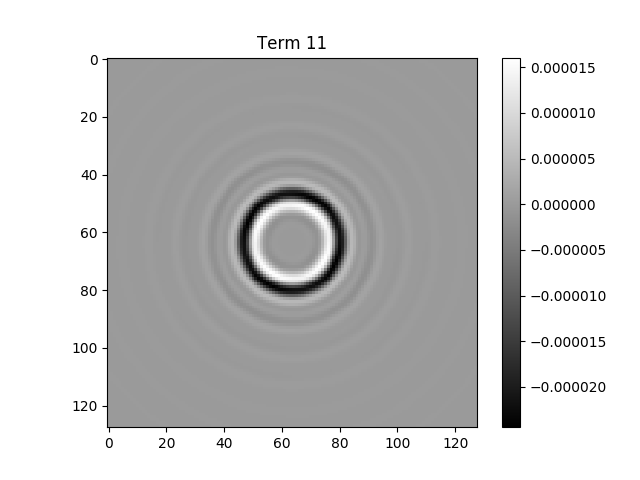

<IPython.core.display.Javascript object>


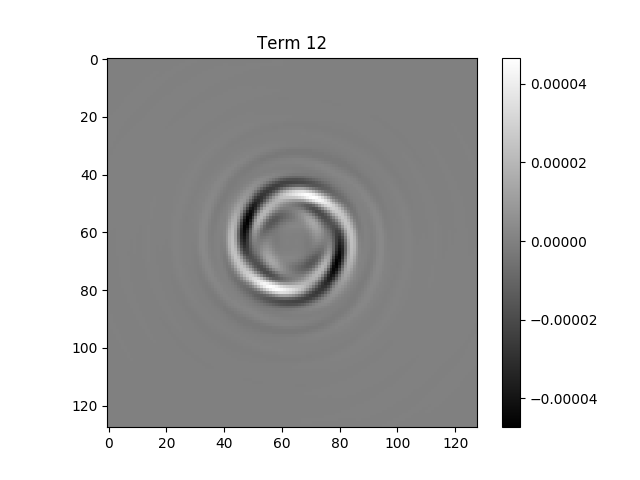

<IPython.core.display.Javascript object>


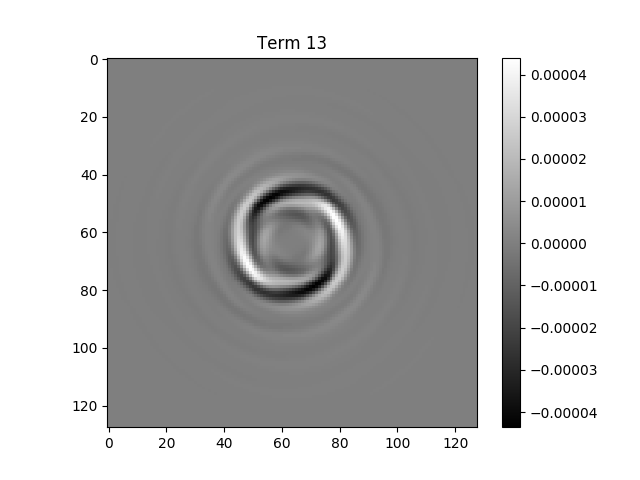

<IPython.core.display.Javascript object>


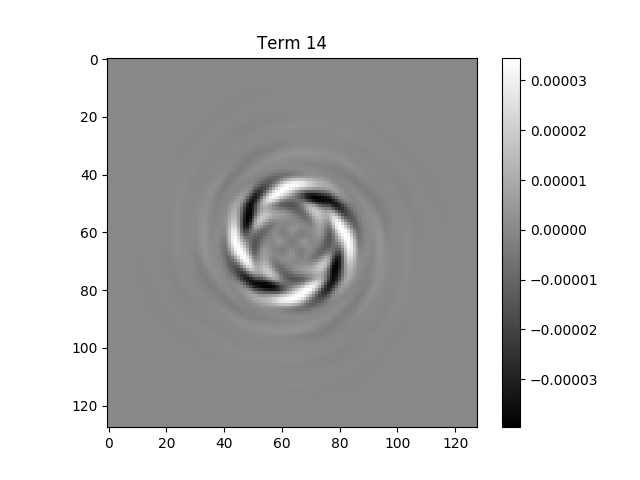

<IPython.core.display.Javascript object>


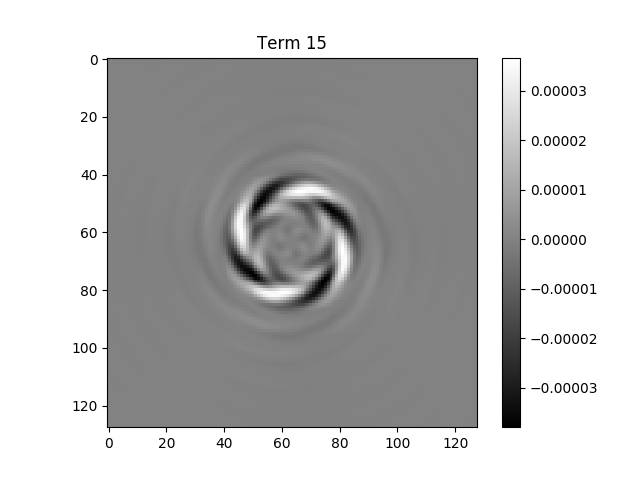

In [135]:
ref = data[:,:,0]
plt.figure()
plt.imshow(ref,cmap='gray')
plt.colorbar()
plt.title('Ref Image')
modes = np.zeros((N,N,M))
for i in range(M):
    modes[:,:,i] = data[:,:,i+1]-ref
    plt.figure()
    plt.imshow(modes[:,:,i],cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(i+2))
    

<IPython.core.display.Javascript object>


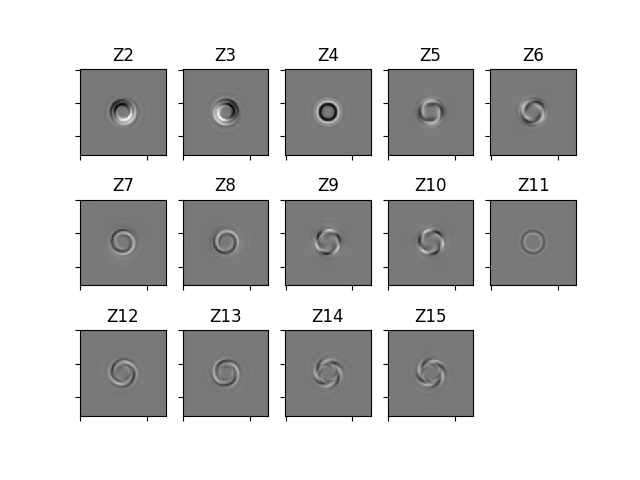

In [136]:
fig = plt.figure()
ax = fig.subplots(3,5)
cmax = np.max(modes)
cmin = np.min(modes)
for i in range(M):
    ax.flat[i].imshow(modes[:,:,i],cmap='gray',vmin=cmin,vmax=cmax)
    #ax[i].show_colorbar()
    ax.flat[i].set_title('Z'+str(i+2))
    ax.flat[i].set_xticklabels('')
    ax.flat[i].set_yticklabels('')
ax.flat[14].set_visible(False)

In [117]:
refdict = {'ref_image':ref}
scipy.io.savemat('ref_image_vortex_128px.mat',refdict)
modesdict = {'modes':modes}
scipy.io.savemat('cal_frames_vortex_128px.mat',modesdict)

In [137]:
A = np.zeros((N**2,M))
for i in range(M):
    A[:,i] = modes[:,:,i].ravel()

In [138]:
Apinv = np.linalg.pinv(A)
print(Apinv.shape)

(14, 16384)


In [139]:
testvec = modes[:,:,0].ravel()
print(testvec.shape)

(16384,)


In [140]:
np.dot(Apinv,testvec)

array([ 1.00000000e+00,  1.31202227e-16,  1.09470538e-16,  1.03918237e-17,
       -1.73484206e-16,  4.74935609e-17,  1.35593034e-16, -5.82600908e-17,
       -9.54640013e-17, -9.64126782e-17,  1.25428639e-16, -4.44035847e-17,
       -2.22810746e-16, -2.12226223e-17])

In [141]:
max_rms_phase = 100e-9
nEx = 50
step = 2*max_rms_phase/nEx

wfe_array_test = np.zeros((M,nEx))
for i in range(nEx):
    wfe_array_test[:,i] = initial_array
    wfe_array_test[0,i] += -1*max_rms_phase + step*i
print(wfe_array_test[:,:3])
print(wfe_array_test[0,:])


[[-1.0e-07 -9.6e-08 -9.2e-08]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]]
[-1.00000000e-07 -9.60000000e-08 -9.20000000e-08 -8.80000000e-08
 -8.40000000e-08 -8.00000000e-08 -7.60000000e-08 -7.20000000e-08
 -6.80000000e-08 -6.40000000e-08 -6.00000000e-08 -5.60000000e-08
 -5.20000000e-08 -4.80000000e-08 -4.40000000e-08 -4.00000000e-08
 -3.60000000e-08 -3.20000000e-08 -2.80000000e-08 -2.40000000e-08
 -2.00000000e-08 -1.60000000e-08 -1.20000000e-08 -8.00000000e-09
 -4.00000000e-09 -1.32348898e-23  4.00000000e-09  8.00000000e-09
  1.20000000e-08  1.60000000e-08  2.00000000e-08  2.40000000e-08
  2.80000000e-08  3.20000000e-08  3.60000000e-08  4.0000000

In [142]:
#print(wfe_array_test[:,60])

In [ ]:
test_data = simulate_multiple_llowfs(wfe_array_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,vortex_charge=vortex_charge)

In [ ]:
to_plot = [25,30,35,45]
for k in to_plot:
    plt.figure()
    plt.imshow(test_data[:,:,k]-ref,cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(k))

In [ ]:
test_results = np.zeros((nEx,M))

for i in range(nEx):
    pixels = (test_data[:,:,i]-ref).ravel()
    calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
    test_results[i,:] = calc_coeffs

In [ ]:
print(test_results.shape)
print(test_results[23,:])

In [ ]:
to_plot = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#colormap = plt.cm.nipy_spectral
colormap = plt.cm.gist_ncar
colorcycle = [colormap(c) for c in np.linspace(0, 1,len(to_plot)+2)]
print(colorcycle)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in to_plot:
    ax1.text((wfe_array_test[0,-1]+1e-9)*1e9,(test_results[-1,i])*1e9-5,str(to_plot[i]+2))
    ax1.plot(wfe_array_test[0,:]*1e9,test_results[:,i]*1e9)
ax1.set_xlabel('True Value of Zernike Coeff. 2 (nm)')
ax1.set_ylabel('Recovered Coeff. (nm)')
ax1.set_ylim([-100,100])
#plt.show()

In [129]:
max_rms_phase = 100e-9
nExDefoc = 30
step = 2*max_rms_phase/nExDefoc

wfe_array_defoc_test = np.zeros((M,nExDefoc))
for i in range(nExDefoc):
    wfe_array_defoc_test[2,i] += -1*max_rms_phase + step*i

In [130]:
#plot defocus response with different values of defocus
#defocus_radians = np.arange(0,3*np.pi,np.pi/4)
defocus_radians = np.array([1,2,3,4,5])
defocus_waves = defocus_radians/(2*np.pi)
nDef = np.size(defocus_waves)

defoc_results = np.zeros((nExDefoc,nDef))

for k,defoc in enumerate(defocus_waves):
    wfe_array = np.zeros((M,M+1))
    for i in range(M):
        wfe_array[i,i+1] = rms_phase_mode
    data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
                    coronagraph=coronagraph,pixelscale=detector_pixelscale,\
                    npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,vortex_charge=vortex_charge)
    ref = data[:,:,0]
    modes = np.zeros((N,N,M))
    for i in range(M):
        modes[:,:,i] = data[:,:,i+1]-ref
    A = np.zeros((N**2,M))
    for i in range(M):
        A[:,i] = modes[:,:,i].ravel()
    Apinv = np.linalg.pinv(A)
    defoc_test_data = simulate_multiple_llowfs(wfe_array_defoc_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,vortex_charge=vortex_charge)
    test_results = np.zeros((nExDefoc,M))
    for i in range(nExDefoc):
        pixels = (defoc_test_data[:,:,i]-ref).ravel()
        calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
        test_results[i,:] = calc_coeffs
    
    defoc_results[:,k] = test_results[:,2]


<IPython.core.display.Javascript object>


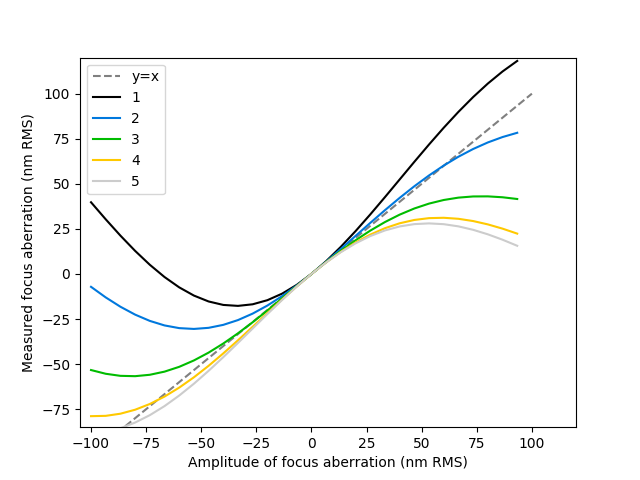

Text(0, 0.5, 'Measured focus aberration (nm RMS)')

In [131]:
colormap = plt.cm.nipy_spectral
#nipy_spectral
colorcycle = [colormap(c) for c in np.linspace(0, 1,nDef)]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in range(nDef):
    ax1.plot(wfe_array_defoc_test[2,:]*1e9,defoc_results[:,i]*1e9)
    #ax1.text(wfe_array_defoc_test[2,-1]*1e9,defoc_results[-1,i]*1e9,str(defocus_radians[i]))
ax1.legend(['y=x']+[str(d) for d in defocus_radians])
ax1.set_xlim([-105,120])
ax1.set_ylim([-85,120])
ax1.set_xlabel('Amplitude of focus aberration (nm RMS)')
ax1.set_ylabel('Measured focus aberration (nm RMS)')

In [10]:
#plot difference of spherical and defocus modes for different values of sensor defocus
defocus_radians = np.array([-5,5,10,20,30,40,50])
defocus_waves = defocus_radians/(2*np.pi)
nDef = np.size(defocus_waves)

wfe_ref_foc_sph = np.zeros((M,3))
wfe_ref_foc_sph[2,1] = 1e-9
wfe_ref_foc_sph[9,2] = 1e-9

refs = np.zeros((N,N,nDef))
modes_foc = np.zeros((N,N,nDef))
modes_sph = np.zeros((N,N,nDef))

for k,defoc in enumerate(defocus_waves):
    data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
                    coronagraph='fqpm',pixelscale=detector_pixelscale,\
                    npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,obscuration=True)
    refs[:,:,k] = data[:,:,0]
    modes_foc[:,:,k] = data[:,:,1]
    modes_sph[:,:,k] = data[:,:,2]
    
    

<IPython.core.display.Javascript object>


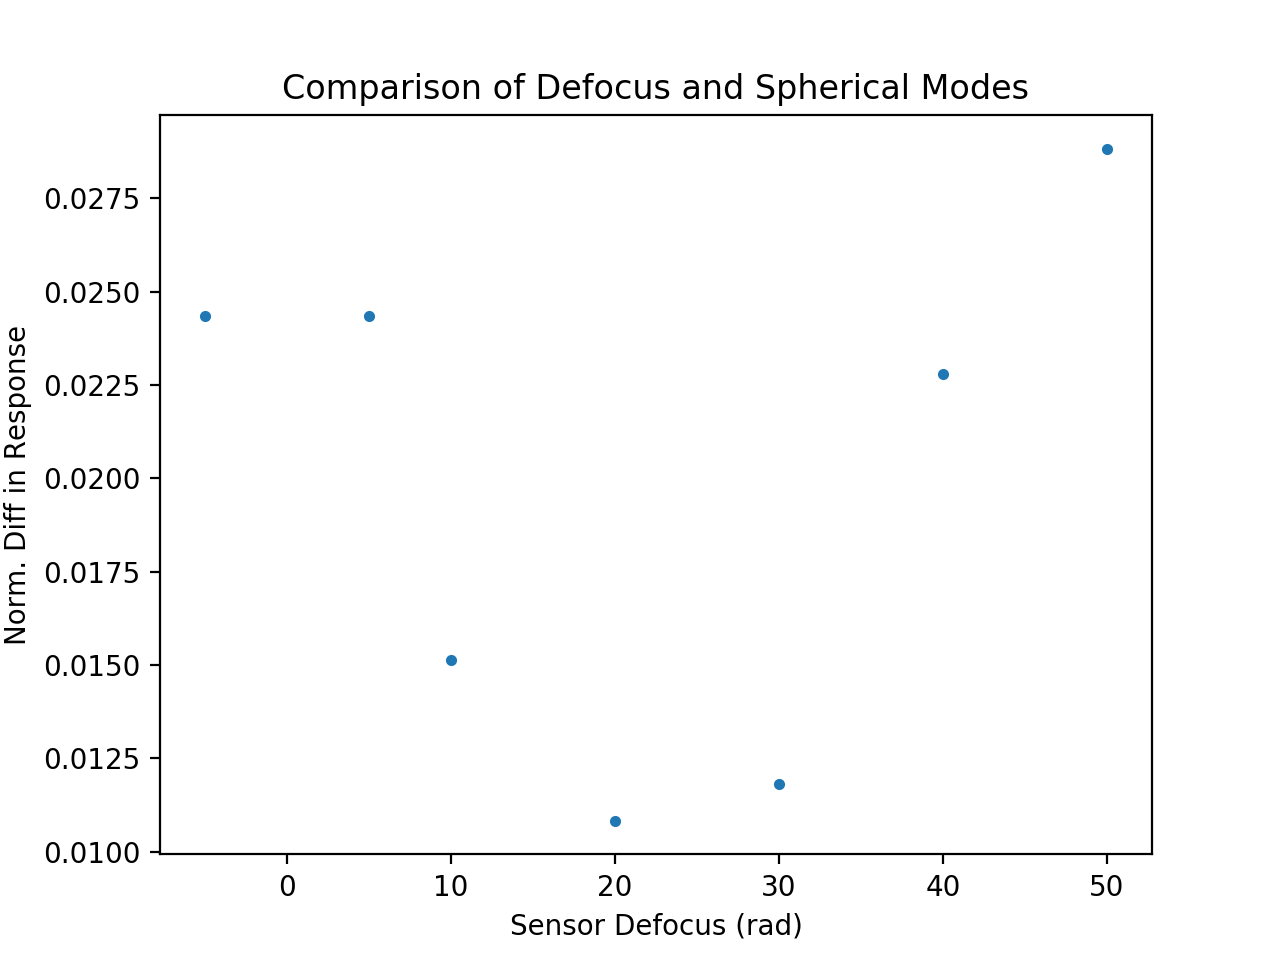

Text(0, 0.5, 'Norm. Diff in Response')

In [11]:
fom = np.zeros((nDef,))
for i in range(nDef):
    fom[i] = np.max(np.abs(modes_foc[:,:,i]-modes_sph[:,:,i])/np.max(refs[:,:,i]))
plt.figure()
plt.plot(defocus_radians,fom,'.')
plt.title('Comparison of Defocus and Spherical Modes')
plt.xlabel('Sensor Defocus (rad)')
plt.ylabel('Norm. Diff in Response')

In [16]:
file = 'vortex_15_individual_400st_100nm_128px.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 5600)
(128, 128, 5600)


In [17]:
print(coeffs[:,:3])

[[-1.00000000e-07 -9.94987469e-08 -9.89974937e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [18]:
K = 400
coeffs_sep = np.zeros((M,K,M))

In [19]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [20]:
coeffs_sep[:,:3,0]

array([[-1.00000000e-07, -9.94987469e-08, -9.89974937e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [21]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M): #loop over coefficients
    for j in range(K): #loop over examples
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,)) 
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [22]:
print(rec_coeffs[:,:3,0])

[[-0.56346471 -0.5664608  -0.56942452]
 [ 0.15612757  0.15554897  0.15496931]
 [-9.28784349 -9.27681367 -9.26502531]
 [ 1.18506499  1.18317945  1.1812155 ]
 [-0.0840005  -0.08505118 -0.08608436]
 [ 2.62872786  2.62695941  2.62500876]
 [-0.4910304  -0.48960577 -0.48818735]
 [ 0.12442558  0.12328297  0.12213846]
 [ 0.19675897  0.19529592  0.19382289]
 [ 8.52978711  8.51573328  8.50105544]
 [ 1.1107824   1.10944435  1.10801497]
 [-0.49442182 -0.49725209 -0.50001803]
 [ 0.0798297   0.07966254  0.07949171]
 [ 0.24569191  0.24504753  0.24439216]]


/Users/gregoryallan/repos/coronagraph-NN-data-gen/nn-gen-venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


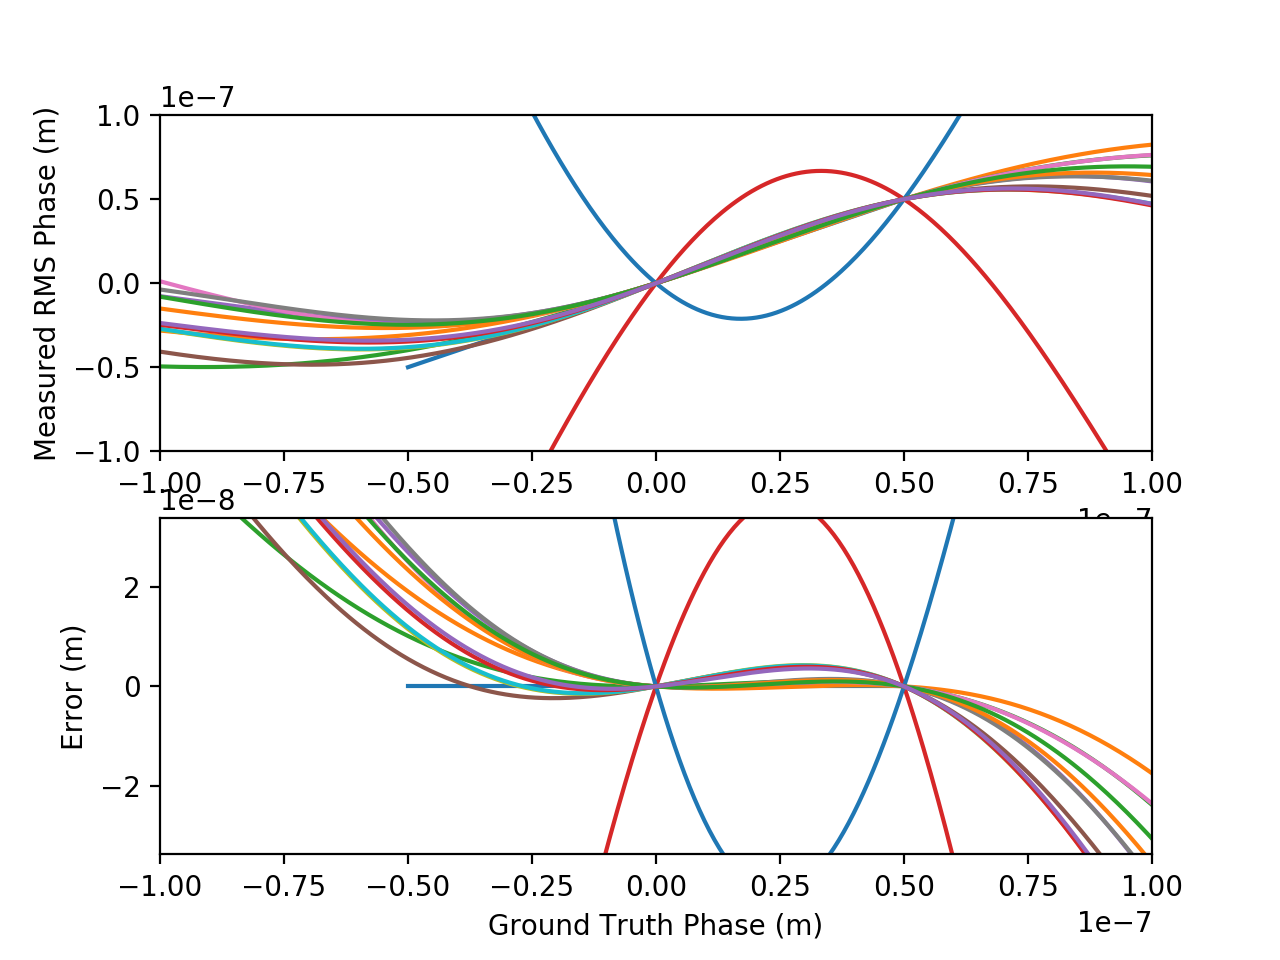

In [23]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode)
    #ax[0].axis('equal')
    ax[0].set_xlim([-100e-9,100e-9])
    ax[0].set_ylim([-100e-9,100e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-100e-9,100e-9])
    ax[1].set_ylim([-10e-9,10e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')

In [24]:
truth = np.zeros((K,M))
reconstruction = np.zeros((K,M))
for i in range (M):
    truth[:,i] = coeffs_sep[i,:,i]
    reconstruction[:,i] = rec_coeffs[i,:,i]
    
mat_out = {
    'truth':truth,
    'reconstruction':reconstruction
}

scipy.io.savemat('linear_llowfs',mat_out)

<IPython.core.display.Javascript object>


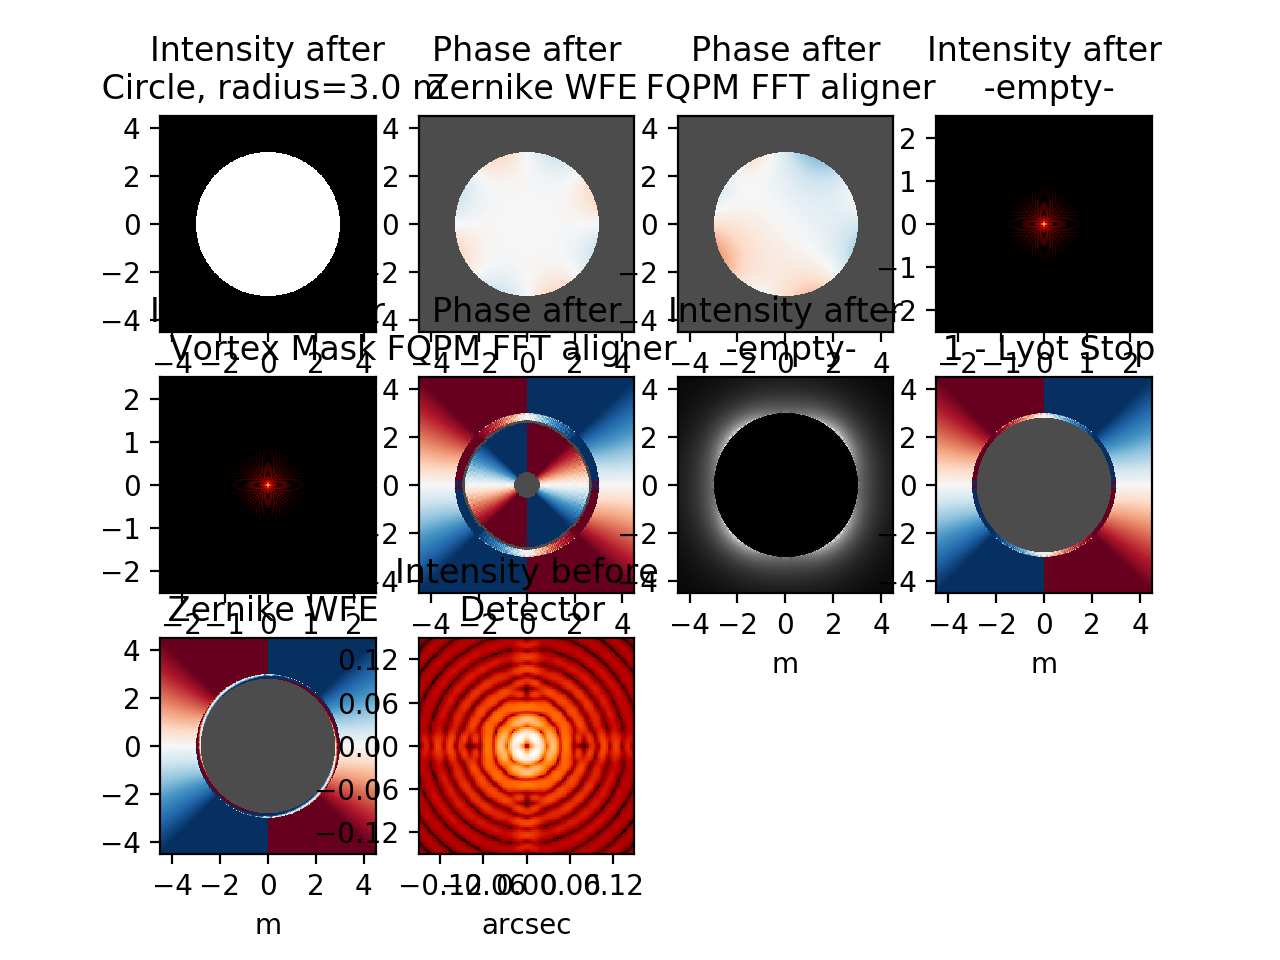

<IPython.core.display.Javascript object>


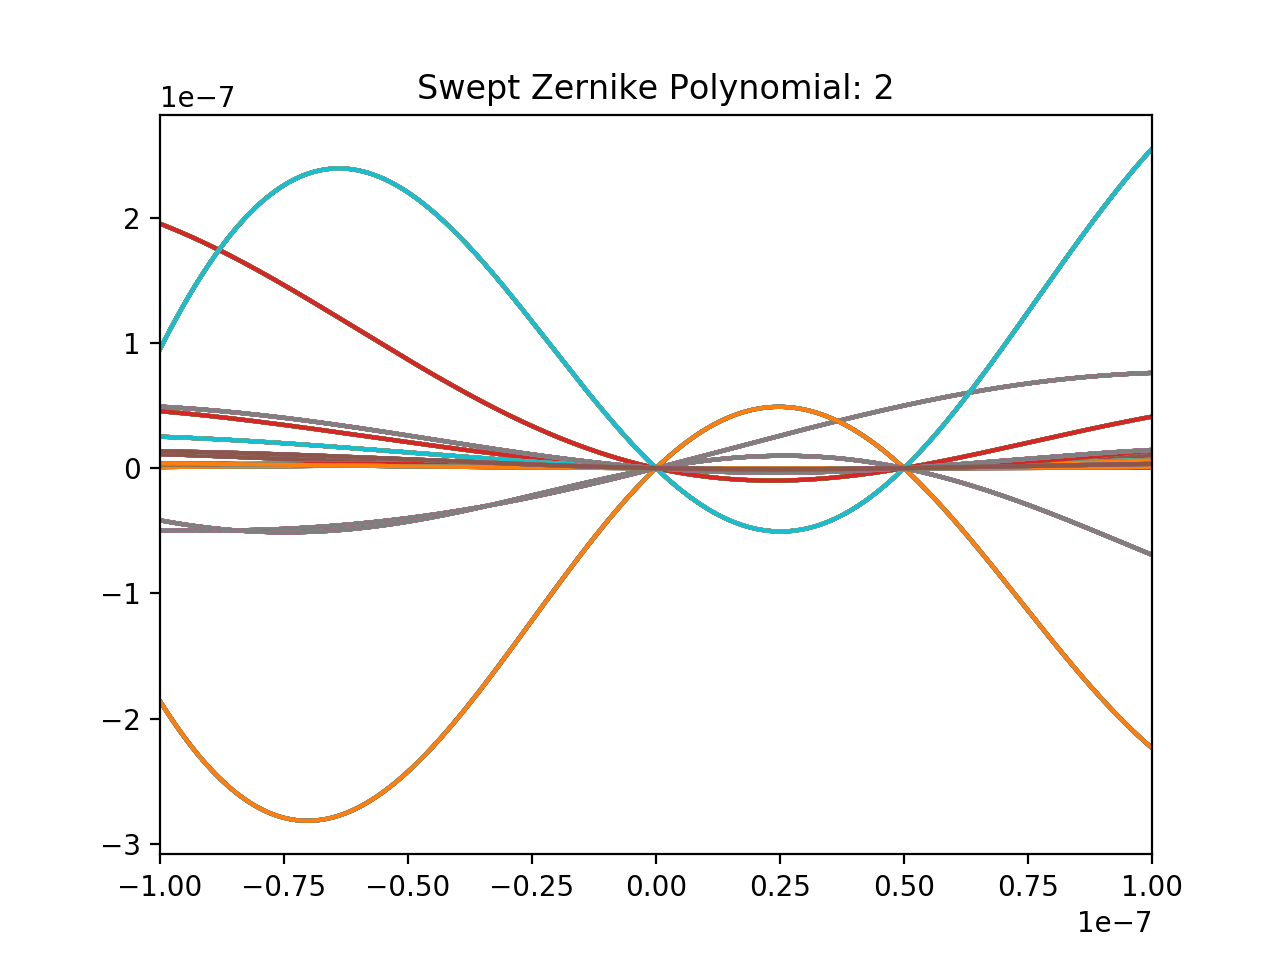

<IPython.core.display.Javascript object>


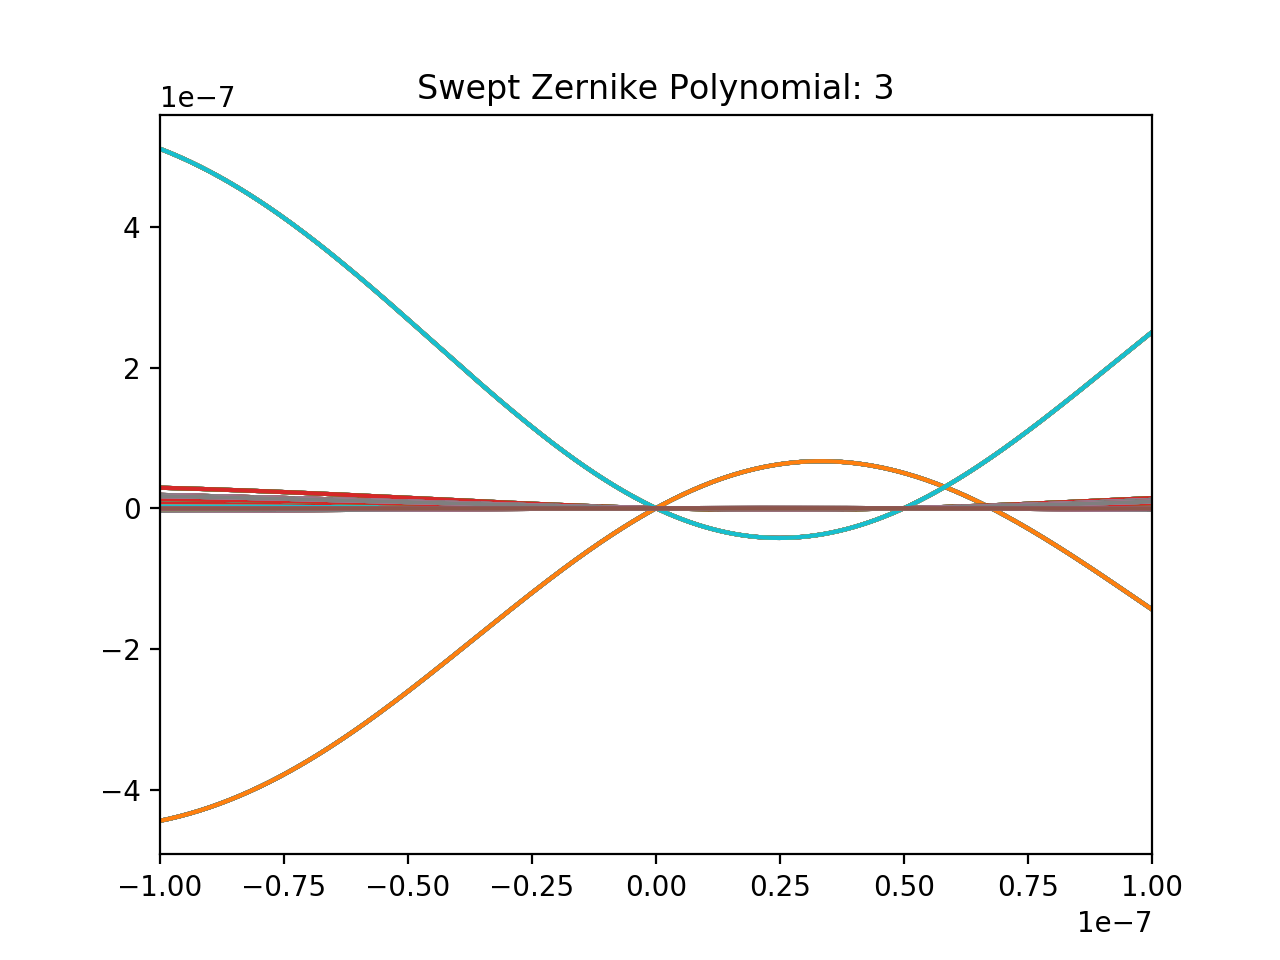

<IPython.core.display.Javascript object>


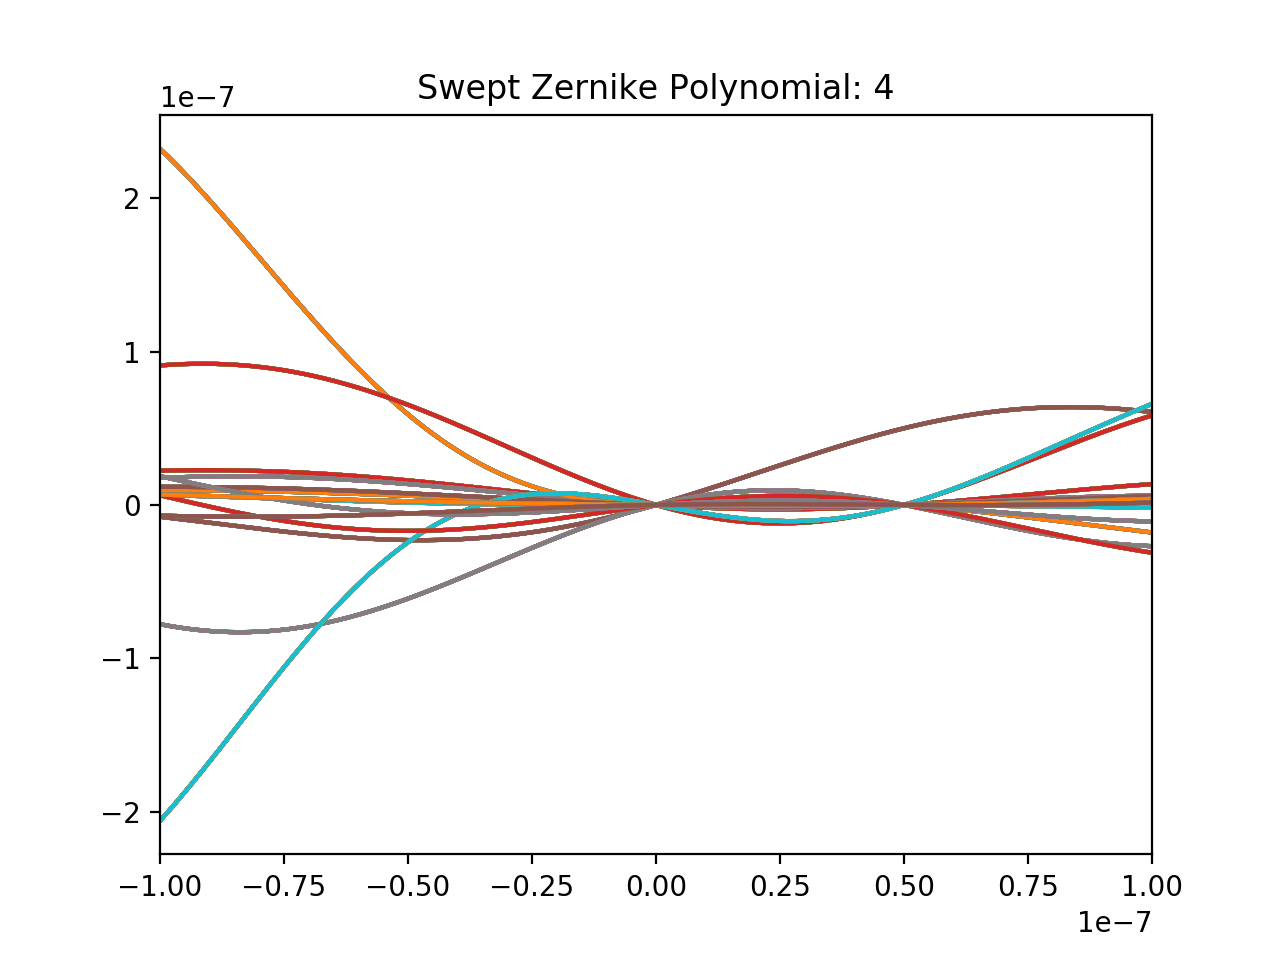

<IPython.core.display.Javascript object>


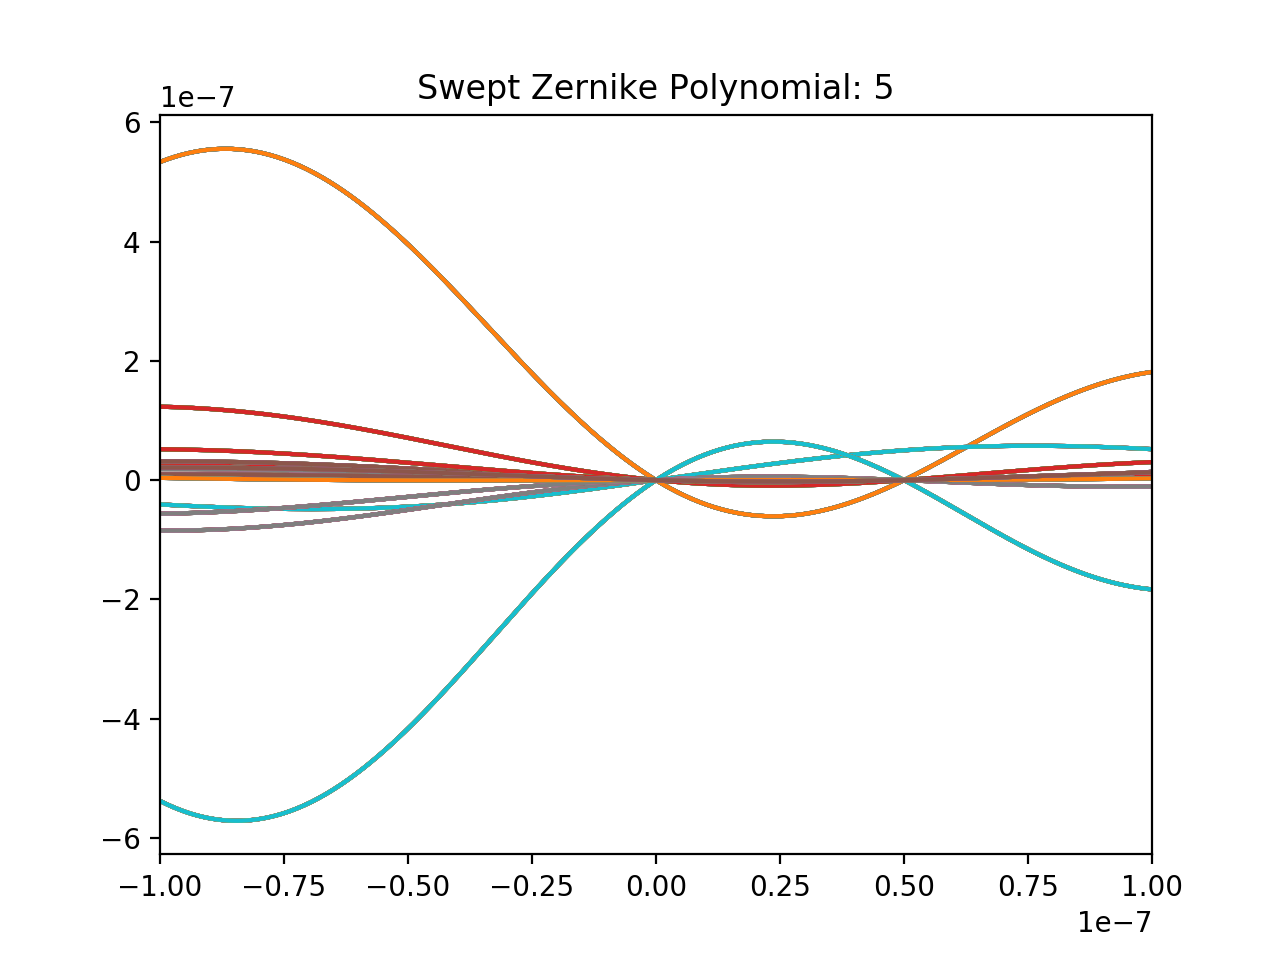

<IPython.core.display.Javascript object>


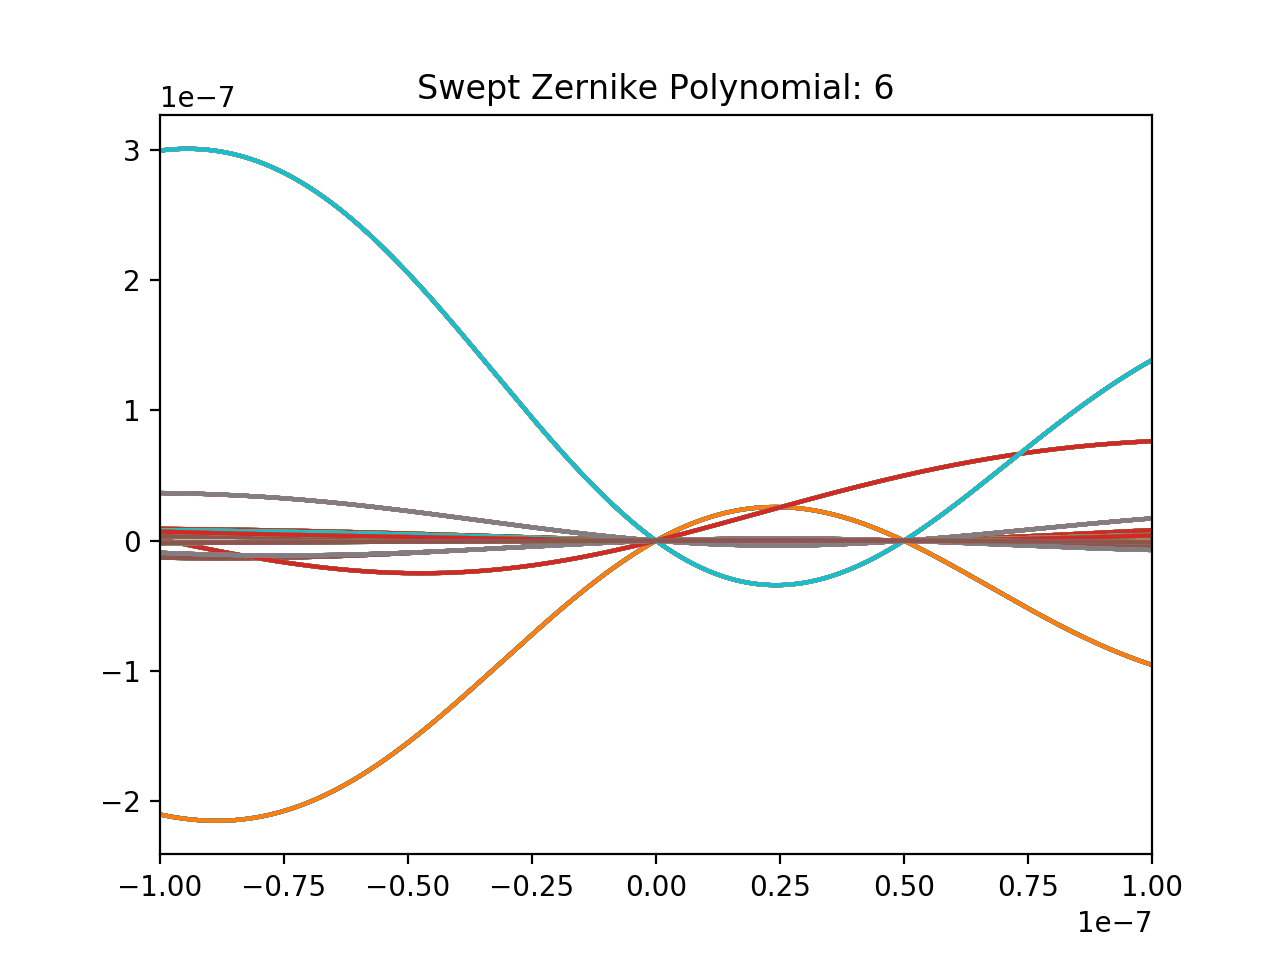

<IPython.core.display.Javascript object>


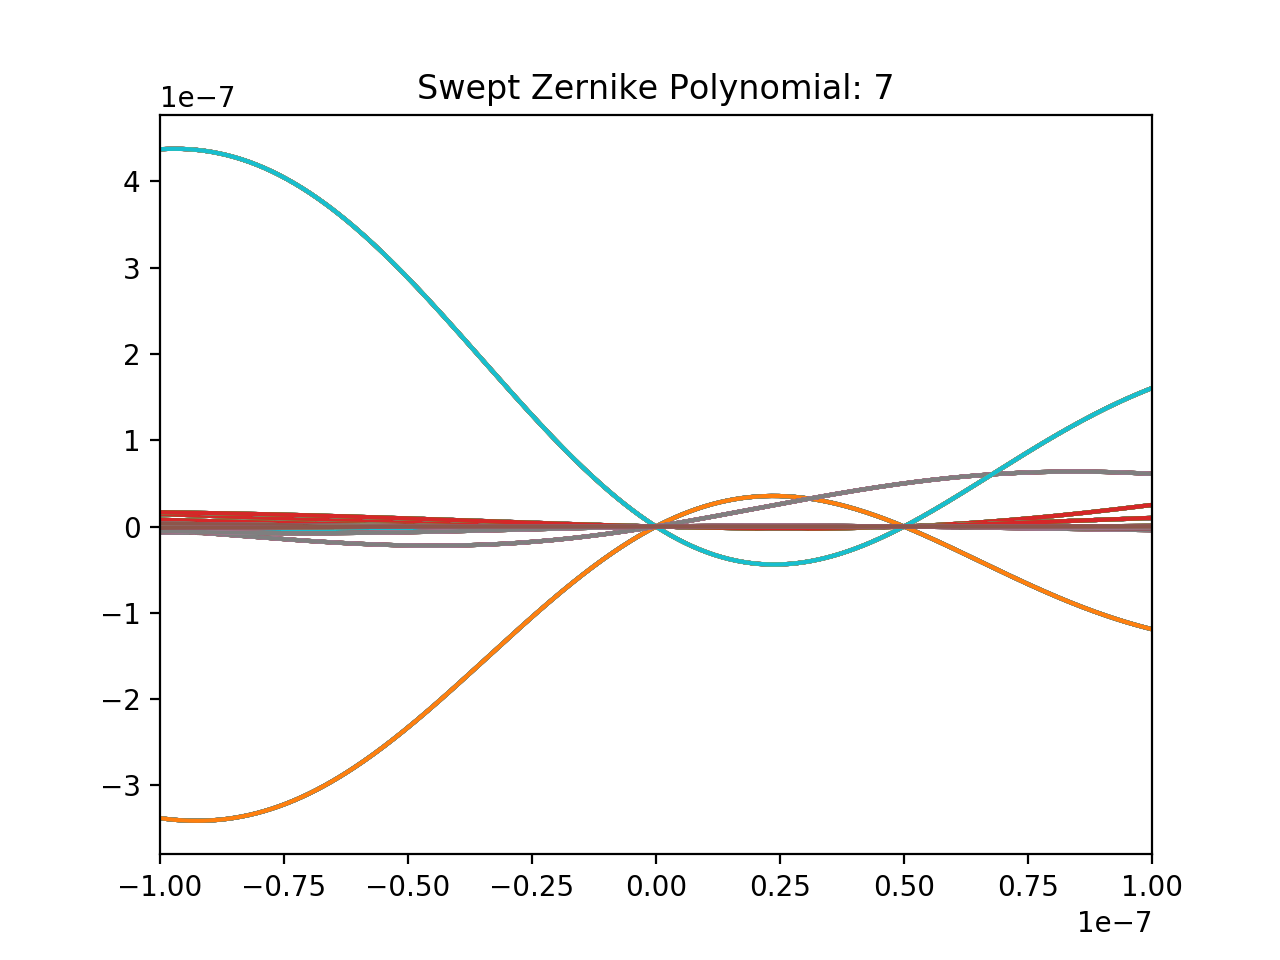

<IPython.core.display.Javascript object>


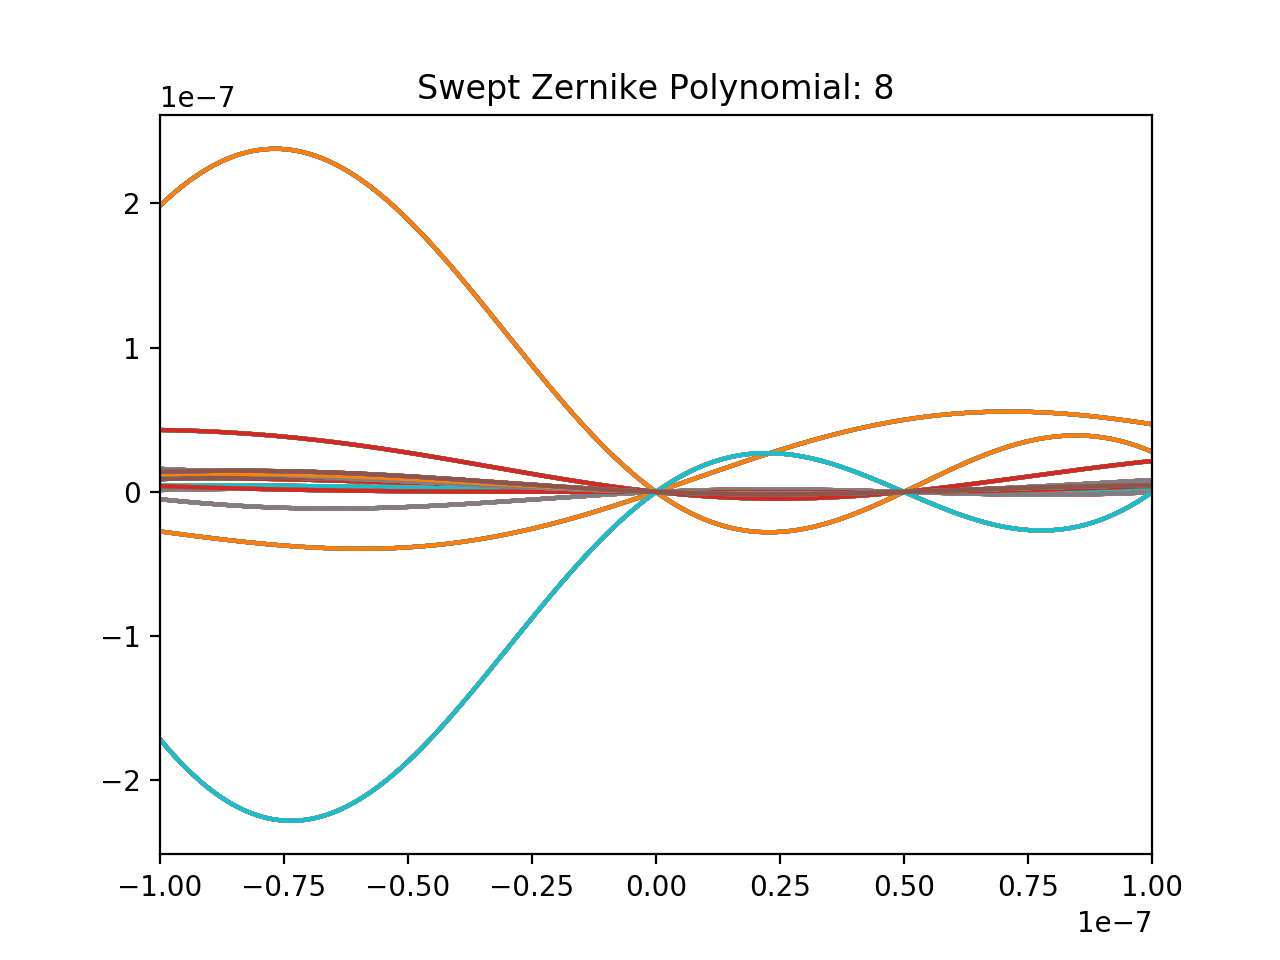

<IPython.core.display.Javascript object>


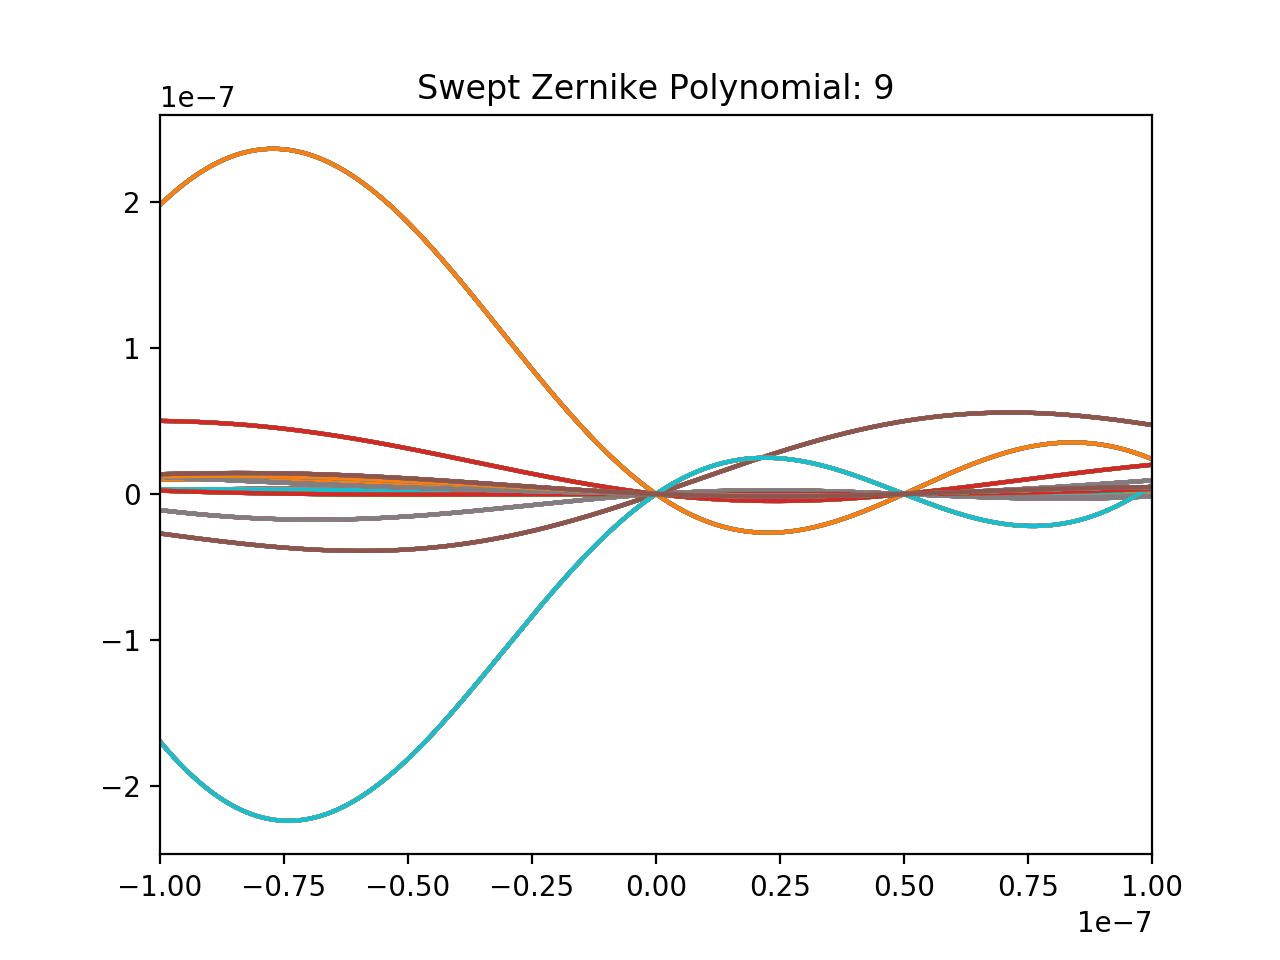

<IPython.core.display.Javascript object>


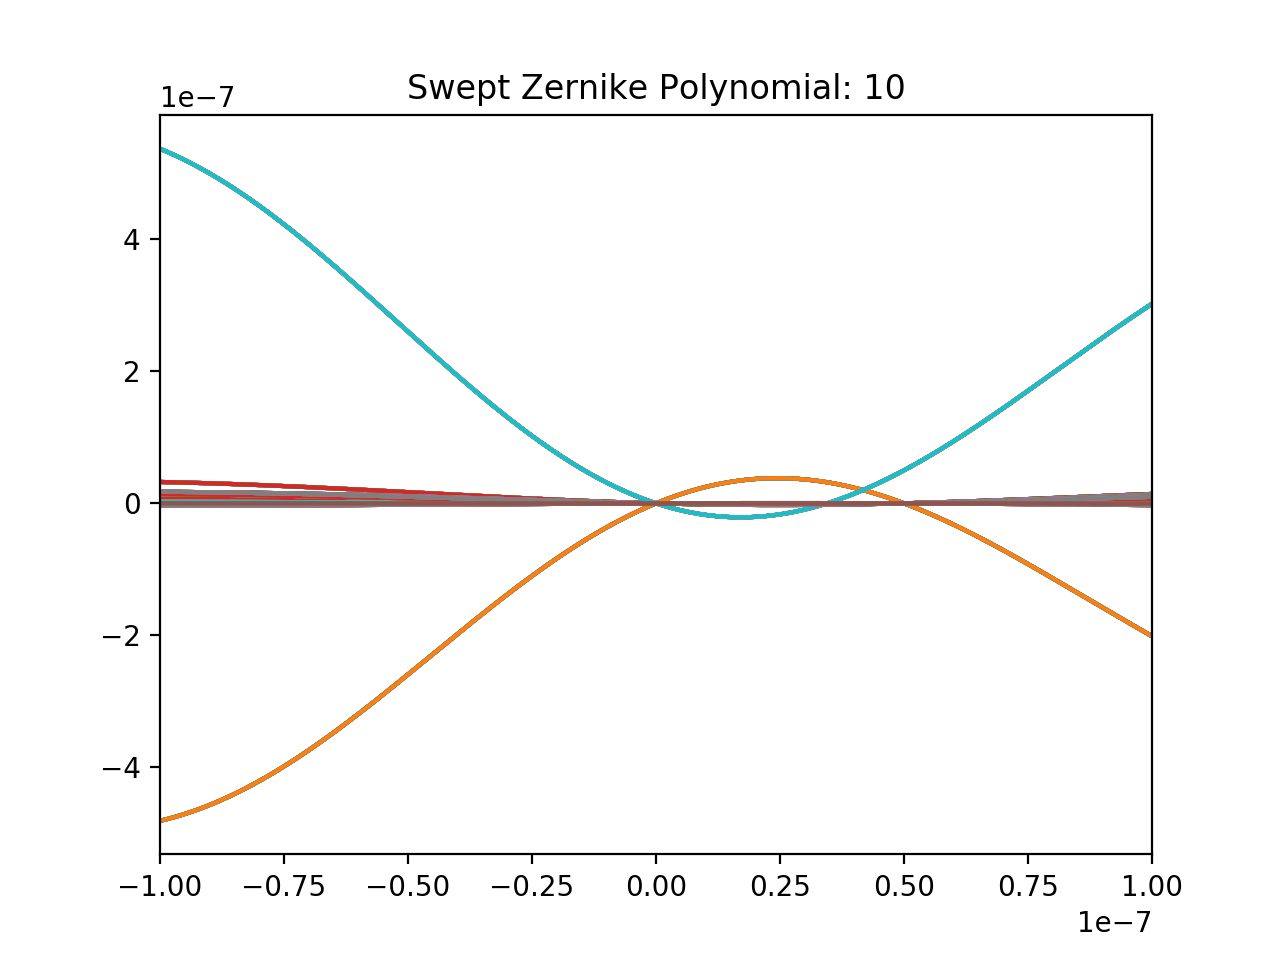

<IPython.core.display.Javascript object>


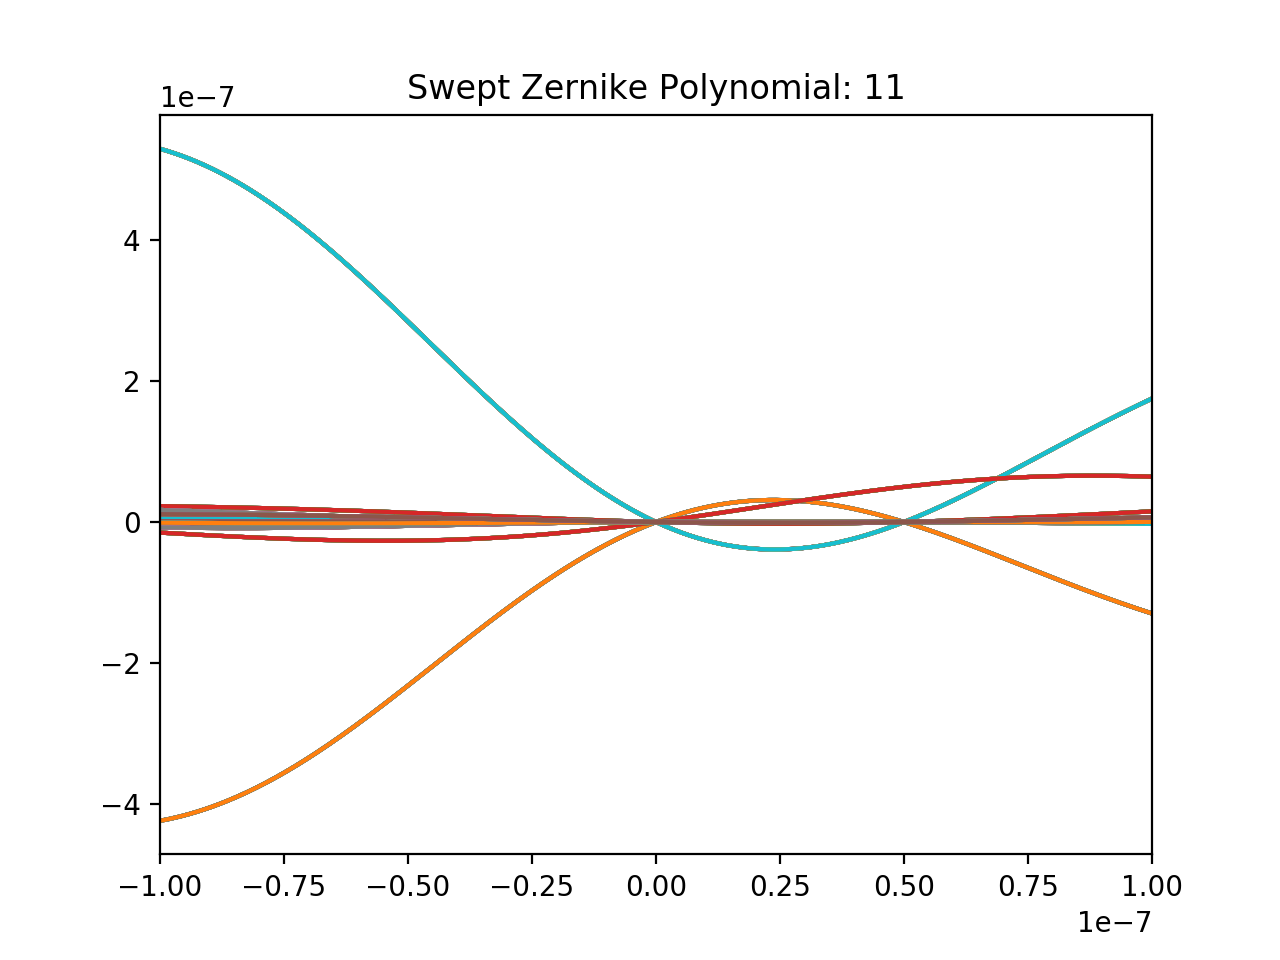

<IPython.core.display.Javascript object>


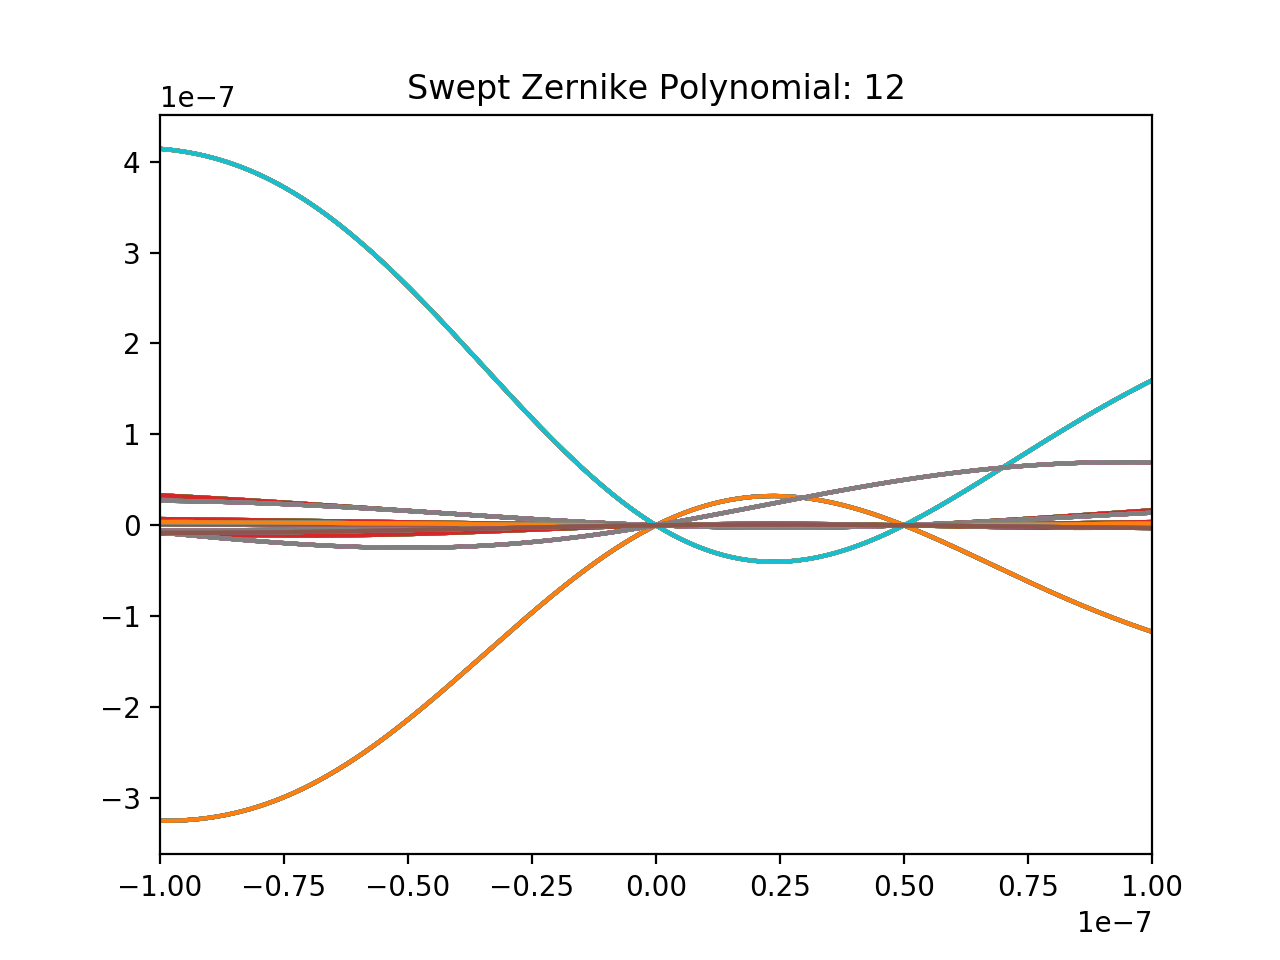

<IPython.core.display.Javascript object>


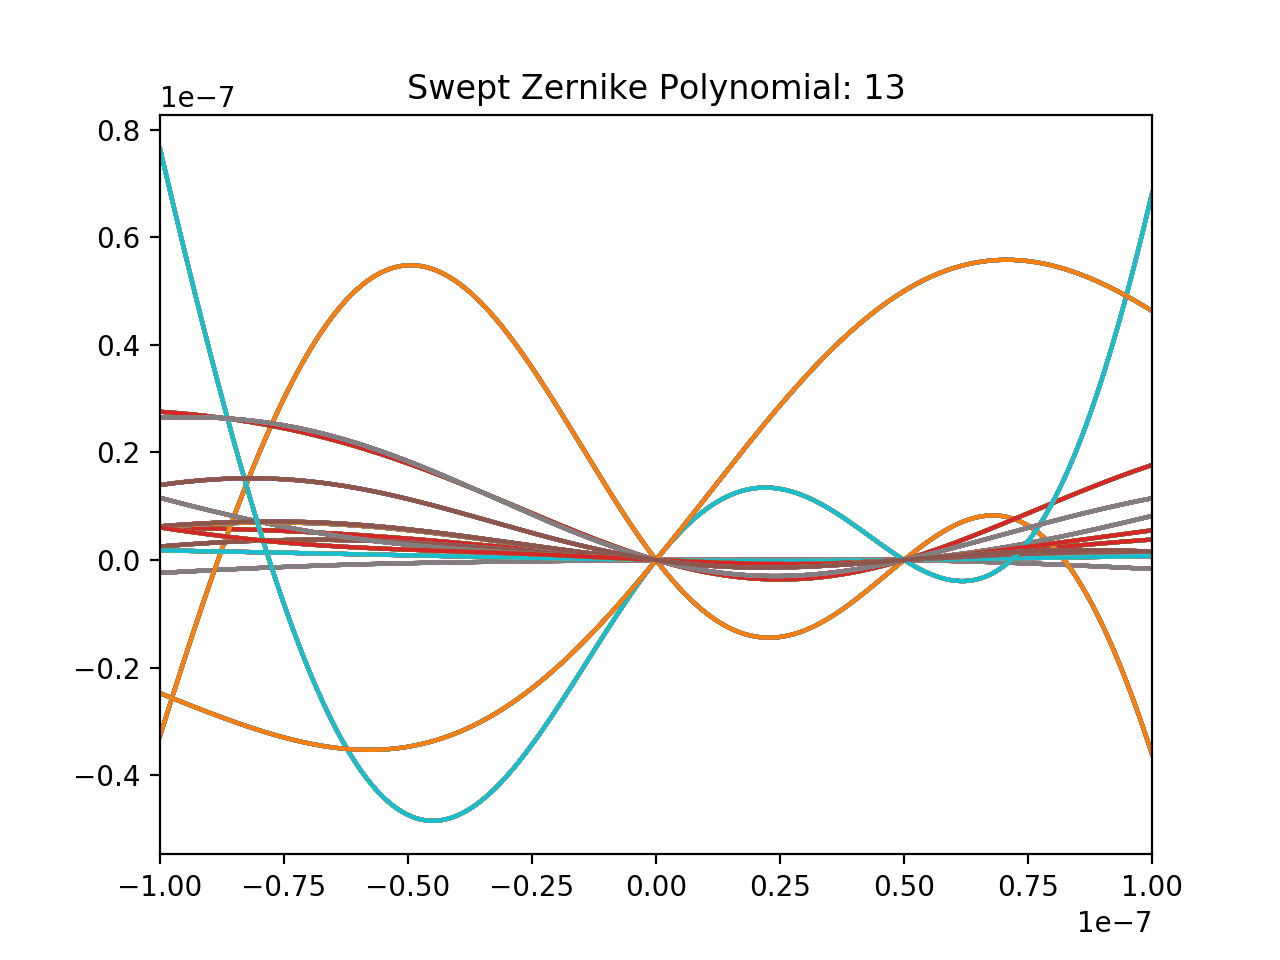

<IPython.core.display.Javascript object>


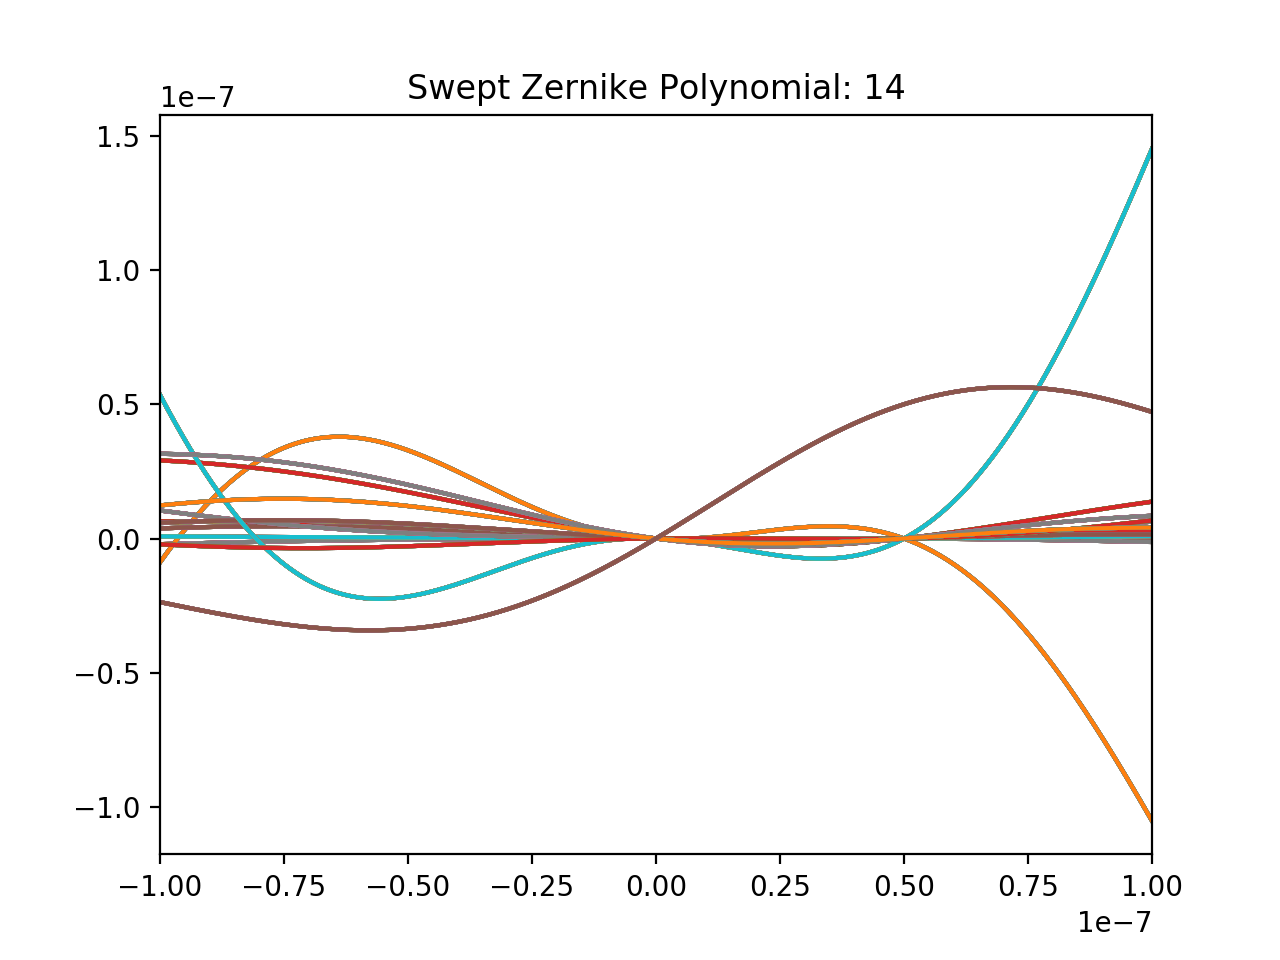

In [25]:
for i in range(M): #loop over coefficients
    plt.figure()
    #for j in range(K): #loop over examples
    truth[:,i] = coeffs_sep[i,:,i]
    for k in range(M): 
        resultsvec = rec_coeffs[k,:,i]*rms_phase_mode
        plt.plot(truth,resultsvec)
        plt.xlim([-100.0*1e-9,100.0*1e-9])
    plt.title('Swept Zernike Polynomial: '+str(i+1))
        #plt.ylim([-50,50])